Students Performance

In this we mainly focous on data analysis and data visualization

Importing libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [6]:
df=pd.read_csv(r'C:\Users\satya\OneDrive\Desktop\ML Projects\dataset\StudentsPerformance.csv')

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no null value in this dataset

In [13]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

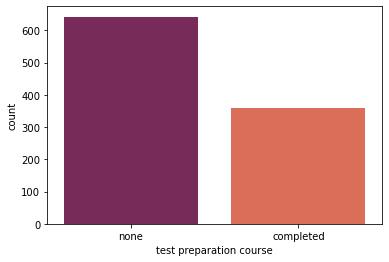

In [101]:
sns.countplot('test preparation course',data=df,palette='rocket')
# we can see no of students which complete thier prepration is less .

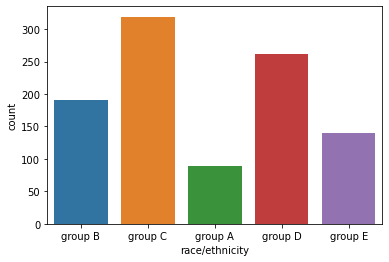

In [15]:
sns.countplot('race/ethnicity',data=df)
#Mostly studenst belogs to group c .

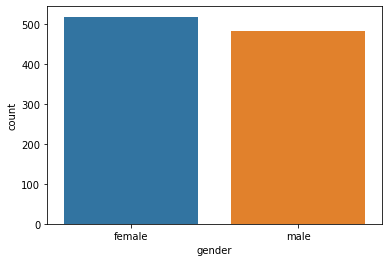

In [16]:
sns.countplot('gender',data=df)
#No of female student is slighlty greater than the no of male students.

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

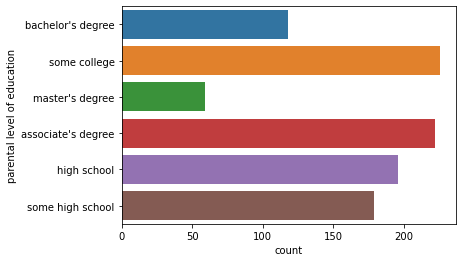

In [19]:
sns.countplot(y='parental level of education',data=df)
df['parental level of education'].value_counts()

SEE the distribution of numerical features

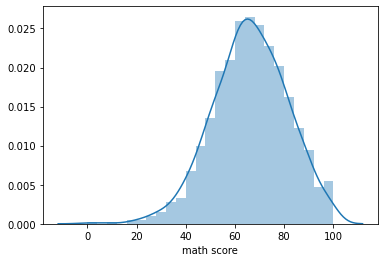

In [20]:
sns.distplot(df['math score'])
#It is normally distributed.

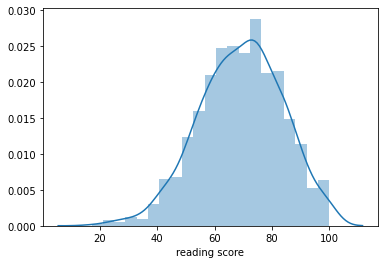

In [21]:
sns.distplot(df['reading score'])
#It is normally distributed.

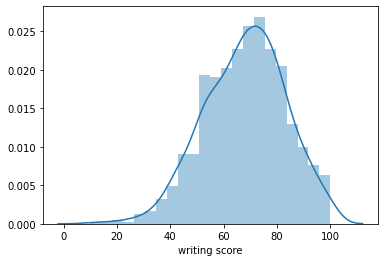

In [22]:
sns.distplot(df['writing score'])
#It is somewhere normally distributed.

SEE the correlation between the dataset

In [26]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


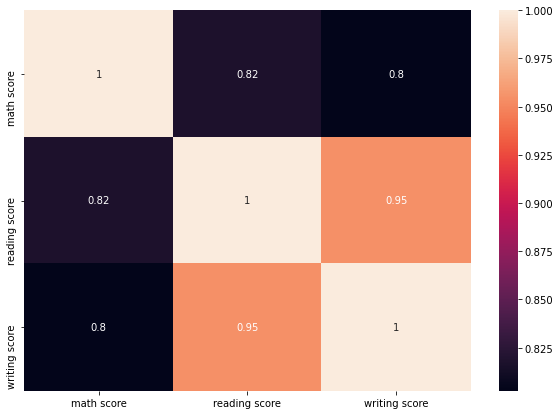

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
# All the numerical features are highly corelated and specially reading score and writing score.

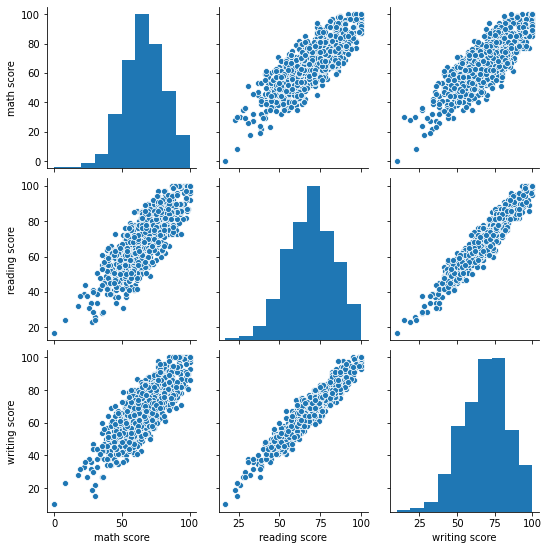

In [27]:
sns.pairplot(df)

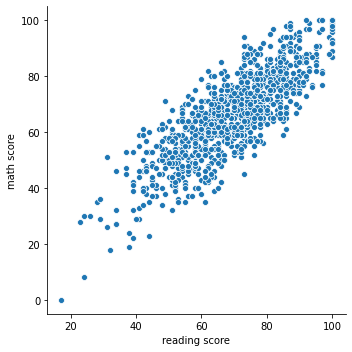

In [30]:
sns.relplot(y='math score',x='reading score',data=df)

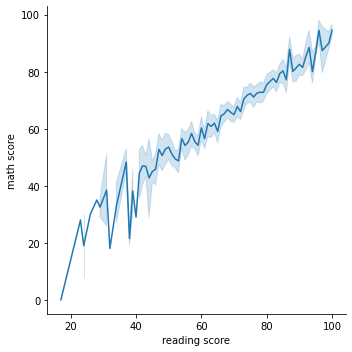

In [31]:
sns.relplot(y='math score',x='reading score',data=df,kind='line')

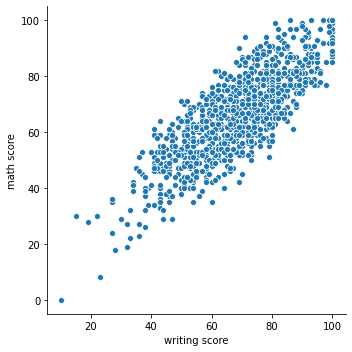

In [41]:
sns.relplot(y='math score',x='writing score',data=df)

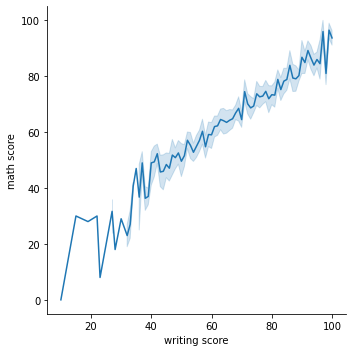

In [43]:
sns.relplot(y='math score',x='writing score',data=df,kind='line')

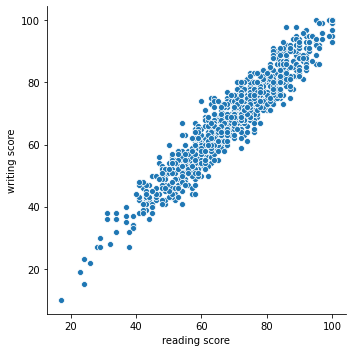

In [33]:
sns.relplot(y='writing score',x='reading score',data=df)

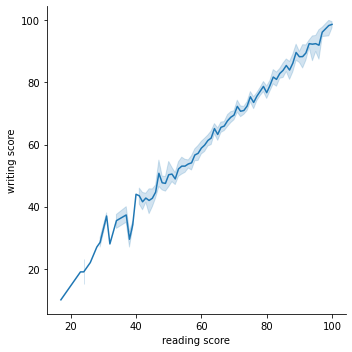

In [34]:
sns.relplot(y='writing score',x='reading score',data=df,kind='line')

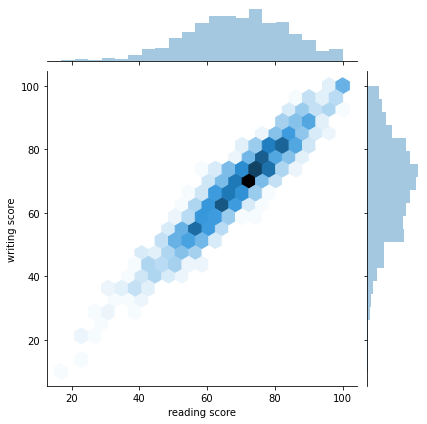

In [36]:
sns.jointplot(y='writing score',x='reading score',data=df,kind='hex')

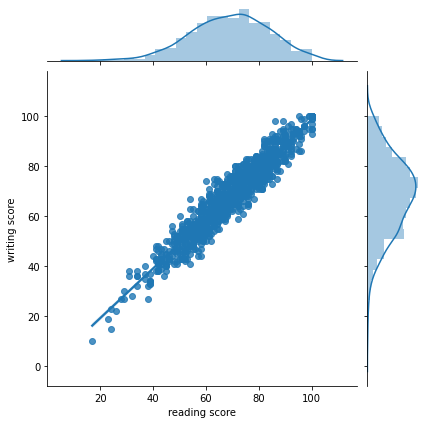

In [38]:
sns.jointplot(y='writing score',x='reading score',data=df,kind='reg')

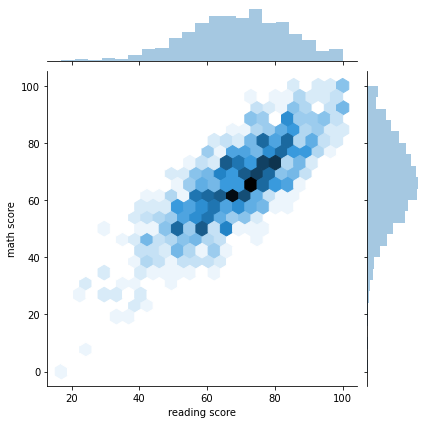

In [39]:
sns.jointplot(y='math score',x='reading score',data=df,kind='hex')

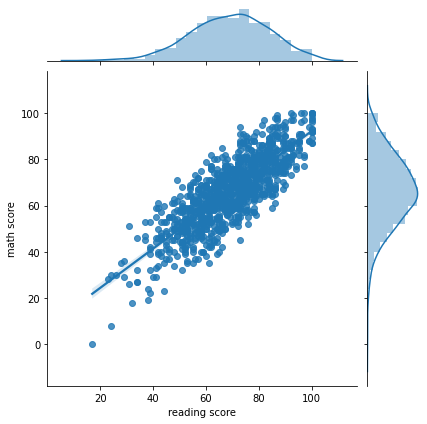

In [40]:
sns.jointplot(y='math score',x='reading score',data=df,kind='reg')

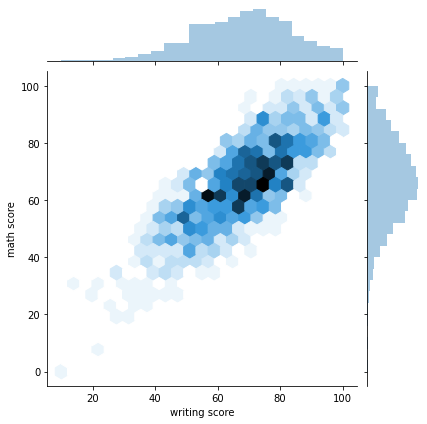

In [44]:
sns.jointplot(y='math score',x='writing score',data=df,kind='hex')

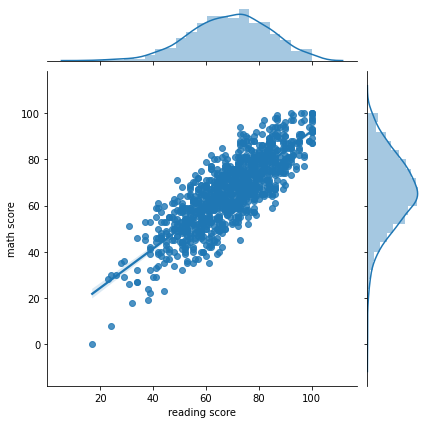

In [45]:
sns.jointplot(y='math score',x='reading score',data=df,kind='reg')

<Figure size 1080x864 with 0 Axes>

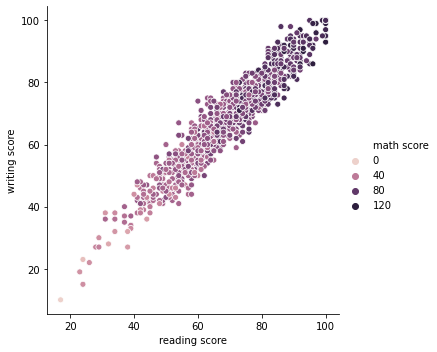

In [54]:
plt.figure(figsize=(15,12))
sns.relplot(y='writing score',x='reading score',hue='math score',data=df,kind='scatter')

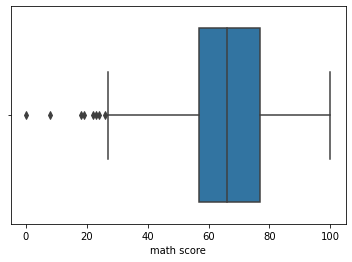

In [58]:
sns.boxplot(df['math score'])

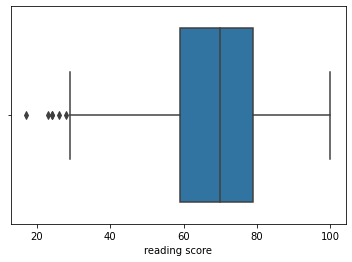

In [59]:
sns.boxplot(df['reading score'])

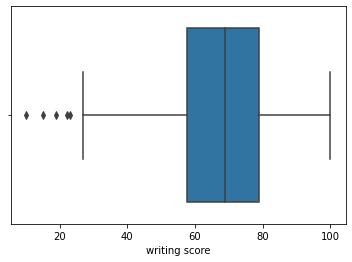

In [60]:
sns.boxplot(df['writing score'])

In [63]:
df['overall score']=df['math score']+df['reading score']+df['writing score']

In [64]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [66]:
df.drop(columns=['math score','reading score','writing score'],inplace=True)

In [67]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,overall score
0,female,group B,bachelor's degree,standard,none,218
1,female,group C,some college,standard,completed,247
2,female,group B,master's degree,standard,none,278
3,male,group A,associate's degree,free/reduced,none,148
4,male,group C,some college,standard,none,229


Now see the overall score dependency with all other features

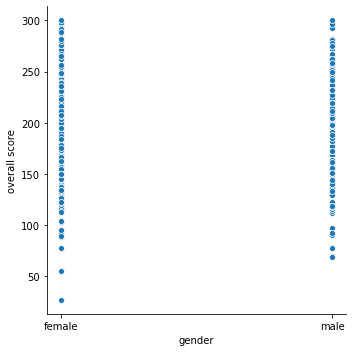

In [71]:
sns.relplot(x='gender',y='overall score',data=df)

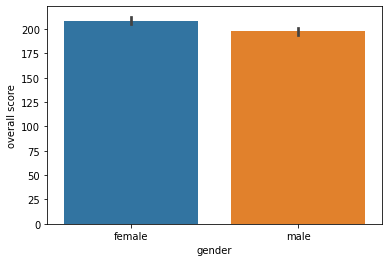

In [70]:
sns.barplot(x='gender',y='overall score',data=df)

In [78]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

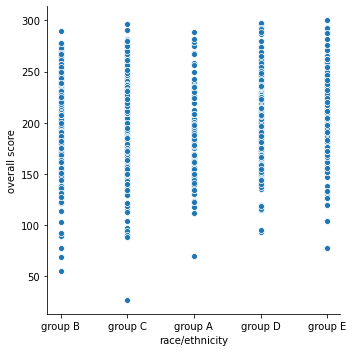

In [75]:
sns.relplot(x='race/ethnicity',y='overall score',data=df)

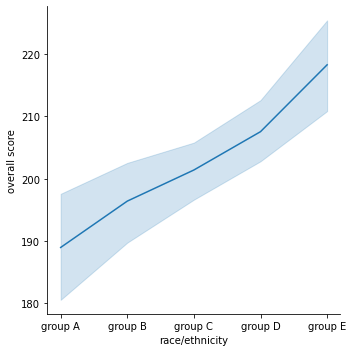

In [77]:
sns.relplot(x='race/ethnicity',y='overall score',data=df,kind='line')

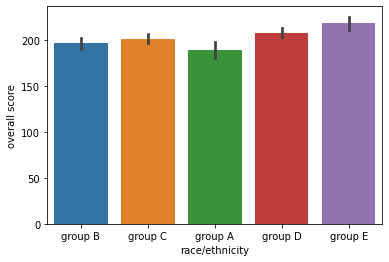

In [76]:
sns.barplot(x='race/ethnicity',y='overall score',data=df)

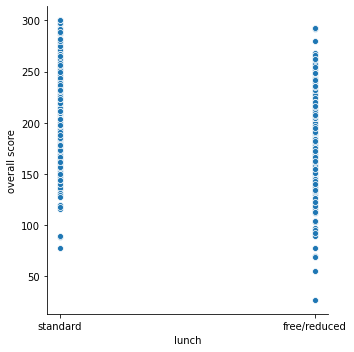

In [79]:
sns.relplot(x='lunch',y='overall score',data=df)

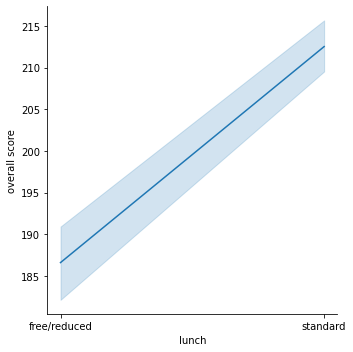

In [80]:
sns.relplot(x='lunch',y='overall score',data=df,kind='line')

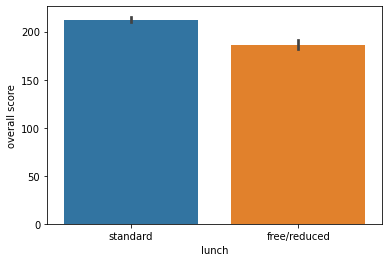

In [81]:
sns.barplot(x='lunch',y='overall score',data=df)

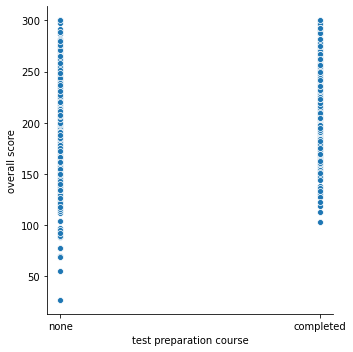

In [82]:
sns.relplot(x='test preparation course',y='overall score',data=df)

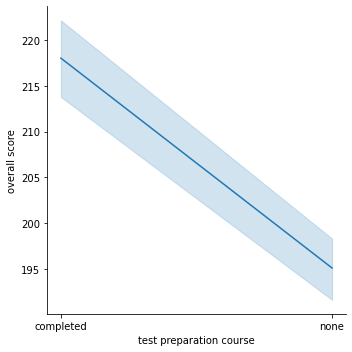

In [84]:
sns.relplot(x='test preparation course',y='overall score',data=df,kind='line')

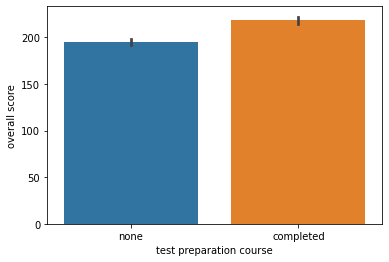

In [85]:
sns.barplot(x='test preparation course',y='overall score',data=df)

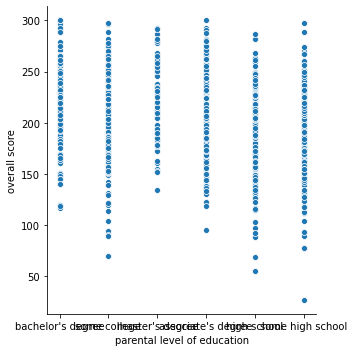

In [87]:
sns.relplot(x='parental level of education',y='overall score',data=df)

<Figure size 864x576 with 0 Axes>

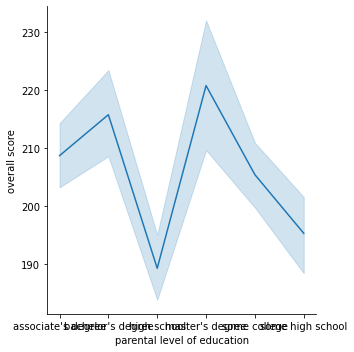

In [91]:
plt.figure(figsize=(12,8))
sns.relplot(x='parental level of education',y='overall score',data=df,kind='line')

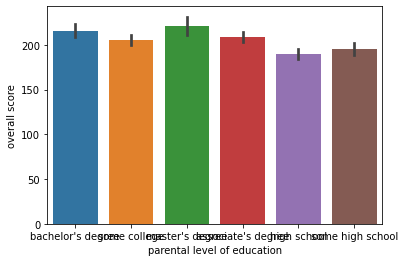

In [92]:
sns.barplot(x='parental level of education',y='overall score',data=df)

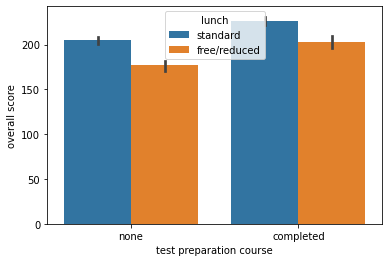

In [93]:
sns.barplot(x='test preparation course',y='overall score',hue='lunch',data=df)

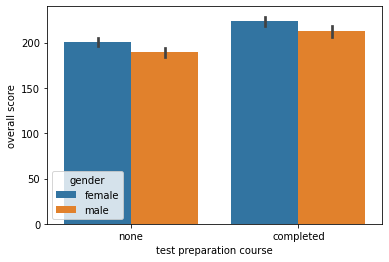

In [94]:
sns.barplot(x='test preparation course',y='overall score',hue='gender',data=df)

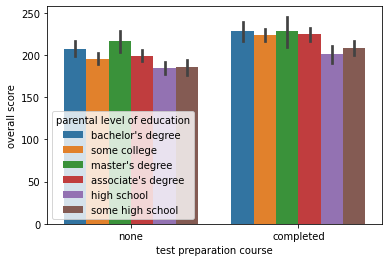

In [95]:
sns.barplot(x='test preparation course',y='overall score',hue='parental level of education',data=df)

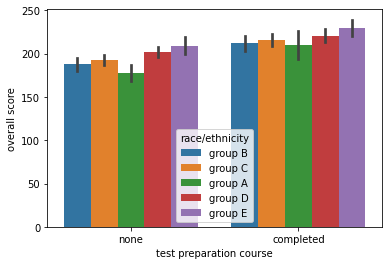

In [96]:
sns.barplot(x='test preparation course',y='overall score',hue='race/ethnicity',data=df)

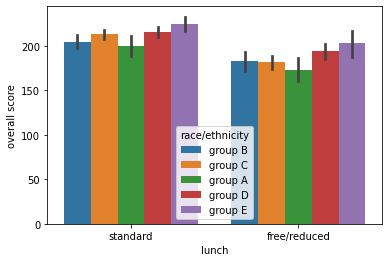

In [97]:
sns.barplot(x='lunch',y='overall score',hue='race/ethnicity',data=df)

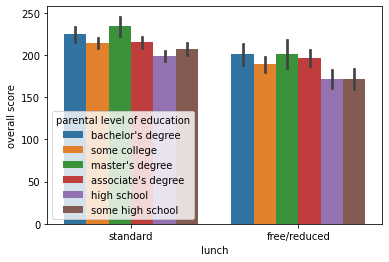

In [98]:
sns.barplot(x='lunch',y='overall score',hue='parental level of education',data=df)

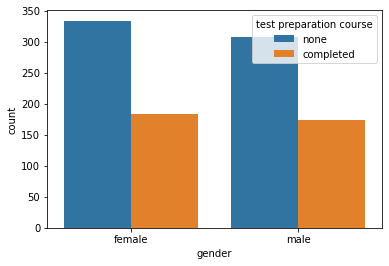

In [102]:
sns.countplot(x='gender',data=df,hue='test preparation course')

WE have completed our data analysis and data visualisation

In [103]:
###### overall score of female is higher than the male students.
###### overall score is increased as race is increased.
###### overall score for parents with higher degree is greater.
###### overall score for standard students is greater than the fee and reduces.
###### reading score ,writing score, maths score are highly correlated so if a student perform good in any one he has good performance in all three .